In [36]:
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:

dfFr = pd.read_csv("./french_messages.csv" ,header=None)
dfFr.columns = ['label' , 'text']
dfFr.head(5)

,label,text
0,ham,Je suis bloqué dans les embouteillages…
1,ham,Peux-tu acheter du pain en rentrant ?
2,spam,Vous avez été sélectionné pour un héritage de ...
3,ham,Repose-toi bien et prends soin de toi !
4,spam,Achetez maintenant et recevez un bonus de 100€...


In [38]:
dfAng = pd.read_csv("./spam.csv" , encoding="ISO-8859-1" , header=None)
dfAng.head(5)

,0,1,2,3,4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [39]:
dfAng = dfAng.iloc[:,0:2]
dfAng.columns = ['label' , 'text']
dfAng.head(5)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [40]:
dfAb= pd.read_csv('./arabic_messages.csv', header= None)
dfAb.columns = ['label' , 'text']
dfAb.head(5)

,label,text
0,ham,مرحبًا، أنا متأخر بسبب الزحام المروري. أراك قر...
1,ham,مرحبًا، هل لديك أخبار عن خالد؟
2,ham,شكرًا لمساعدتك، كان ذلك رائعًا!
3,spam,عرض لا يصدق! جربه بنفسك الآن!
4,spam,فاتورتك الهاتفية في انتظار السداد، قم بالدفع هنا.


In [41]:
print(dfAb.shape , ' ',dfAng.shape, ' ', dfFr.shape)

(3000, 2)   (5572, 2)   (4500, 2)


In [42]:
dfAng.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


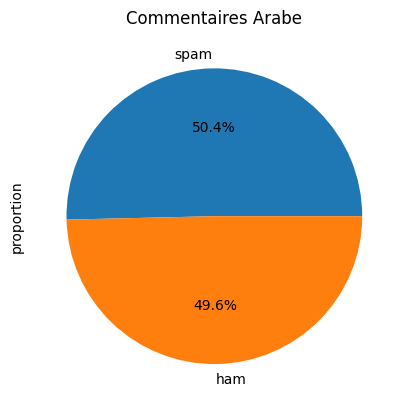

In [43]:
dfAb.label.value_counts(normalize= True).plot.pie(autopct ='%1.1f%%')
plt.title('Commentaires Arabe')
plt.show()

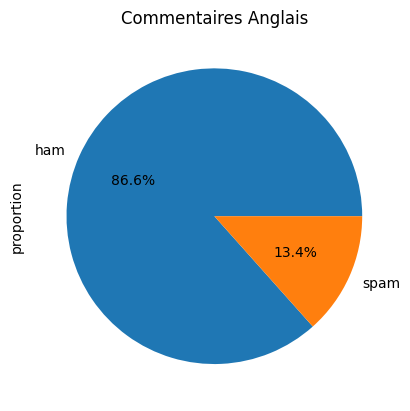

In [44]:
dfAng.label.value_counts(normalize= True).plot.pie(autopct ='%1.1f%%')
plt.title('Commentaires Anglais')
plt.show()

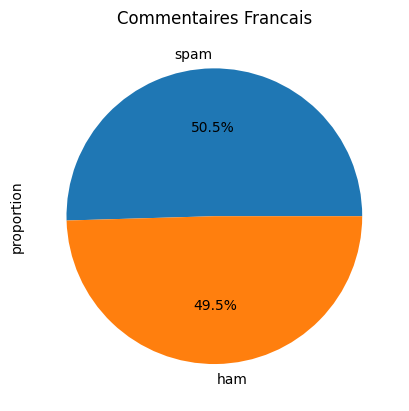

In [45]:
dfFr.label.value_counts(normalize= True).plot.pie(autopct ='%1.1f%%')
plt.title('Commentaires Francais')
plt.show()

In [46]:
import string
punct = string.punctuation

punct = punct + '؟'

In [47]:
def removePunc(text) : 
    text_np = "".join([char for char in text if char not in punct])
    return text_np

In [48]:
dfAng['text_np'] = dfAng['text'].apply(lambda x : removePunc(x.lower()))
dfAb['text_np'] = dfAb['text'].apply(lambda x : removePunc(x.lower()))
dfFr['text_np'] = dfFr['text'].apply(lambda x : removePunc(x.lower()))

In [49]:
dfAng.head(5)

,label,text,text_np
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [50]:
from nltk.tokenize import word_tokenize

In [51]:
def tokenize(text):
    tokens = word_tokenize(text)
    return tokens

In [52]:
dfAng['text_tokens'] = dfAng['text_np'].apply(lambda x : tokenize(x))
dfAb['text_tokens'] = dfAb['text_np'].apply(lambda x : tokenize(x))
dfFr['text_tokens'] = dfFr['text_np'].apply(lambda x : tokenize(x))

In [53]:
dfAng.head(5)

,label,text,text_np,text_tokens
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


In [54]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [55]:
from nltk.corpus import stopwords
stopw = stopwords.words('english') + stopwords.words('french') + stopwords.words('arabic')

stopw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [56]:
def removeStopW(text): 
    nsw = [word for word in text if word not in stopw]
    return nsw

In [57]:
dfAng['text_nostop'] = dfAng['text_tokens'].apply(lambda x : removeStopW(x))
dfAb['text_nostop'] = dfAb['text_tokens'].apply(lambda x : removeStopW(x))
dfFr['text_nostop'] = dfFr['text_tokens'].apply(lambda x : removeStopW(x))

In [58]:
dfAb.head(5)

,label,text,text_np,text_tokens,text_nostop
0,ham,مرحبًا، أنا متأخر بسبب الزحام المروري. أراك قر...,مرحبًا، أنا متأخر بسبب الزحام المروري أراك قريبًا,"[مرحبًا،, أنا, متأخر, بسبب, الزحام, المروري, أ...","[مرحبًا،, متأخر, بسبب, الزحام, المروري, أراك, ..."
1,ham,مرحبًا، هل لديك أخبار عن خالد؟,مرحبًا، هل لديك أخبار عن خالد,"[مرحبًا،, هل, لديك, أخبار, عن, خالد]","[مرحبًا،, لديك, أخبار, خالد]"
2,ham,شكرًا لمساعدتك، كان ذلك رائعًا!,شكرًا لمساعدتك، كان ذلك رائعًا,"[شكرًا, لمساعدتك،, كان, ذلك, رائعًا]","[شكرًا, لمساعدتك،, رائعًا]"
3,spam,عرض لا يصدق! جربه بنفسك الآن!,عرض لا يصدق جربه بنفسك الآن,"[عرض, لا, يصدق, جربه, بنفسك, الآن]","[عرض, يصدق, جربه, بنفسك]"
4,spam,فاتورتك الهاتفية في انتظار السداد، قم بالدفع هنا.,فاتورتك الهاتفية في انتظار السداد، قم بالدفع هنا,"[فاتورتك, الهاتفية, في, انتظار, السداد،, قم, ب...","[فاتورتك, الهاتفية, انتظار, السداد،, قم, بالدفع]"


In [59]:
ps = nltk.PorterStemmer()

In [67]:
import spacy


nlpf = spacy.load('fr_core_news_sm')

def lemFr(text):
    lemmatized_text = []
    
  
    doc = nlpf(' '.join(text))
    

    for word in doc:
        lemmatized_text.append(word.lemma_)  
    
    return lemmatized_text


In [68]:
import stanza

stanza.download('ar')


2025-02-25 14:25:51 INFO: Downloaded file to C:\Users\HP\stanza_resources\resources.json
2025-02-25 14:25:52 INFO: Downloading default packages for language: ar (Arabic) ...
2025-02-25 14:25:53 INFO: File exists: C:\Users\HP\stanza_resources\ar\default.zip
2025-02-25 14:25:56 INFO: Finished downloading models and saved to C:\Users\HP\stanza_resources


In [69]:
import stanza


nlpa = stanza.Pipeline(lang='ar', processors='tokenize,mwt,pos,lemma')



2025-02-25 14:25:58 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2025-02-25 14:25:59 INFO: Downloaded file to C:\Users\HP\stanza_resources\resources.json
2025-02-25 14:25:59 INFO: Loading these models for language: ar (Arabic):
| Processor | Package       |
-----------------------------
| tokenize  | padt          |
| mwt       | padt          |
| pos       | padt_charlm   |
| lemma     | padt_nocharlm |

2025-02-25 14:25:59 INFO: Using device: cpu
2025-02-25 14:25:59 INFO: Loading: tokenize
2025-02-25 14:25:59 INFO: Loading: mwt
2025-02-25 14:25:59 INFO: Loading: pos
2025-02-25 14:26:02 INFO: Loading: lemma
2025-02-25 14:26:02 INFO: Done loading processors!


In [70]:
def lemAng(text) :
    ts = [ps.stem(word) for word in text]
    return ts

In [71]:
def lemFr(text):
    lemmatized_text = []
    
    
    doc = nlpf(' '.join(text))
    
    
    for word in doc:
        lemmatized_text.append(word.lemma_)  
    
    return lemmatized_text

In [79]:
def lemAb(text):
    lemmatized_text = []

    if isinstance(text, list):
        text = ' '.join(text)

    doc = nlpa(text)

    for sentence in doc.sentences:
        for word in sentence.words:
            lemmatized_text.append(word.lemma) 

    return " ".join(lemmatized_text)

In [ ]:
dfAng['text_lem'] = dfAng['text_nostop'].apply(lambda x : lemAng(x))
dfFr['text_lem'] = dfFr['text_nostop'].apply(lambda x : lemFr(x))

In [80]:
dfAb['text_lem'] = dfAb['text_nostop'].apply(lambda x : lemAb(x))

In [82]:
dfAng.to_csv('cleanAng.csv',index=False)
dfFr.to_csv('cleanFr.csv',index=False)
dfAb.to_csv('cleanAB.csv',index=False)

In [83]:
dfAng.head(5)

,label,text,text_np,text_tokens,text_nostop,text_lem
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, g...","[go, jurong, point, crazi, avail, bugi, great,..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, already, say]","[u, dun, say, earli, hor, u, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."
